Arif Shaikh

Oasis Task- 2 : Unemployment Analysis

In [20]:
# importing necessary libraries

import warnings
warnings.filterwarnings("ignore") 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [21]:
# loading the dataset and checking its shape(rows and col)

df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
print(df.shape)

(267, 9)


In [22]:
# last 5 entries
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [23]:
# Displays the data types of each column
df.dtypes 

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

In [24]:
# Statistical summary of numerical columns
print(df.describe())

        Estimated Unemployment Rate (%)   Estimated Employed  \
count                        267.000000         2.670000e+02   
mean                          12.236929         1.396211e+07   
std                           10.803283         1.336632e+07   
min                            0.500000         1.175420e+05   
25%                            4.845000         2.838930e+06   
50%                            9.650000         9.732417e+06   
75%                           16.755000         2.187869e+07   
max                           75.850000         5.943376e+07   

        Estimated Labour Participation Rate (%)   longitude    latitude  
count                                267.000000  267.000000  267.000000  
mean                                  41.681573   22.826048   80.532425  
std                                    7.845419    6.270731    5.831738  
min                                   16.770000   10.850500   71.192400  
25%                                   37.265000   18.

In [25]:
# Check the number of missing values in each column
df.isnull().sum()  

# handle missing value if present
# df.dropna()  # Drop rows with missing values
# df.fillna(value)  # Fill missing values with a specific value


Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [26]:
print(df.columns)

# rename columns
df.columns=["states", "date", "freq", "est unemploy rt", "est employed", "est labour pati rt", "region", "lat", "long"]
print(df.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')
Index(['states', 'date', 'freq', 'est unemploy rt', 'est employed',
       'est labour pati rt', 'region', 'lat', 'long'],
      dtype='object')


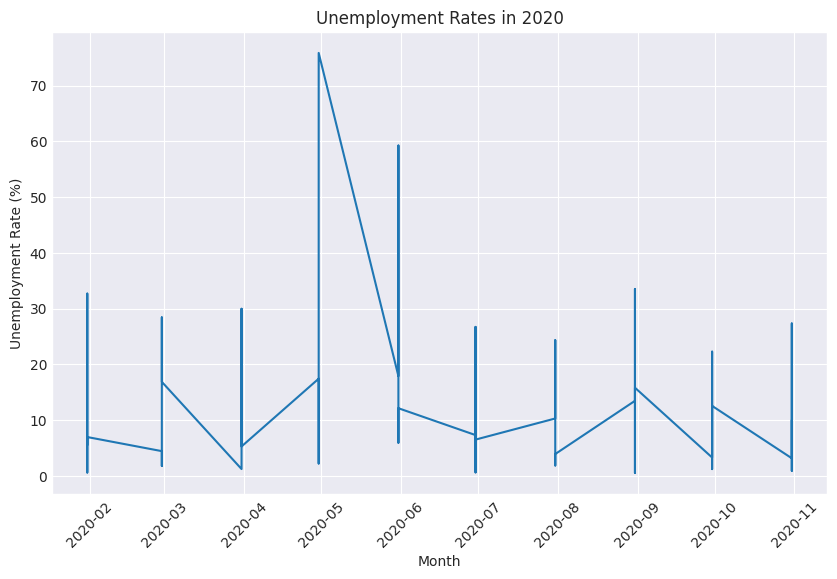

In [27]:
# Remove leading and trailing spaces from the 'date' column
df['date'] = df['date'].str.strip()

# Convert the 'date' column to datetime format with the correct format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Sort the dataframe by date
df = df.sort_values('date')

# Plot a line chart of unemployment rates by month in 2020
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['est unemploy rt'])
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rates in 2020')
plt.xticks(rotation=45)
plt.show()

# we see a peak in between the month of may and june

In [28]:
# correlation matrix
df.corr()

,est unemploy rt,est employed,est labour pati rt,lat,long
est unemploy rt,1.000000,-0.245176,-0.073540,0.149976,-0.023976
est employed,-0.245176,1.000000,-0.047948,-0.113664,-0.119321
est labour pati rt,-0.073540,-0.047948,1.000000,0.080372,0.397836
lat,0.149976,-0.113664,0.080372,1.000000,0.125895
long,-0.023976,-0.119321,0.397836,0.125895,1.000000


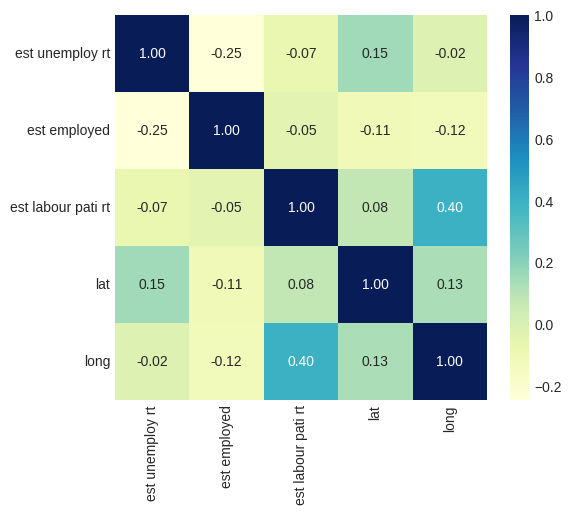

In [29]:
# heatmap
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(),annot=True, fmt=".2f", cmap="YlGnBu")
plt.show()

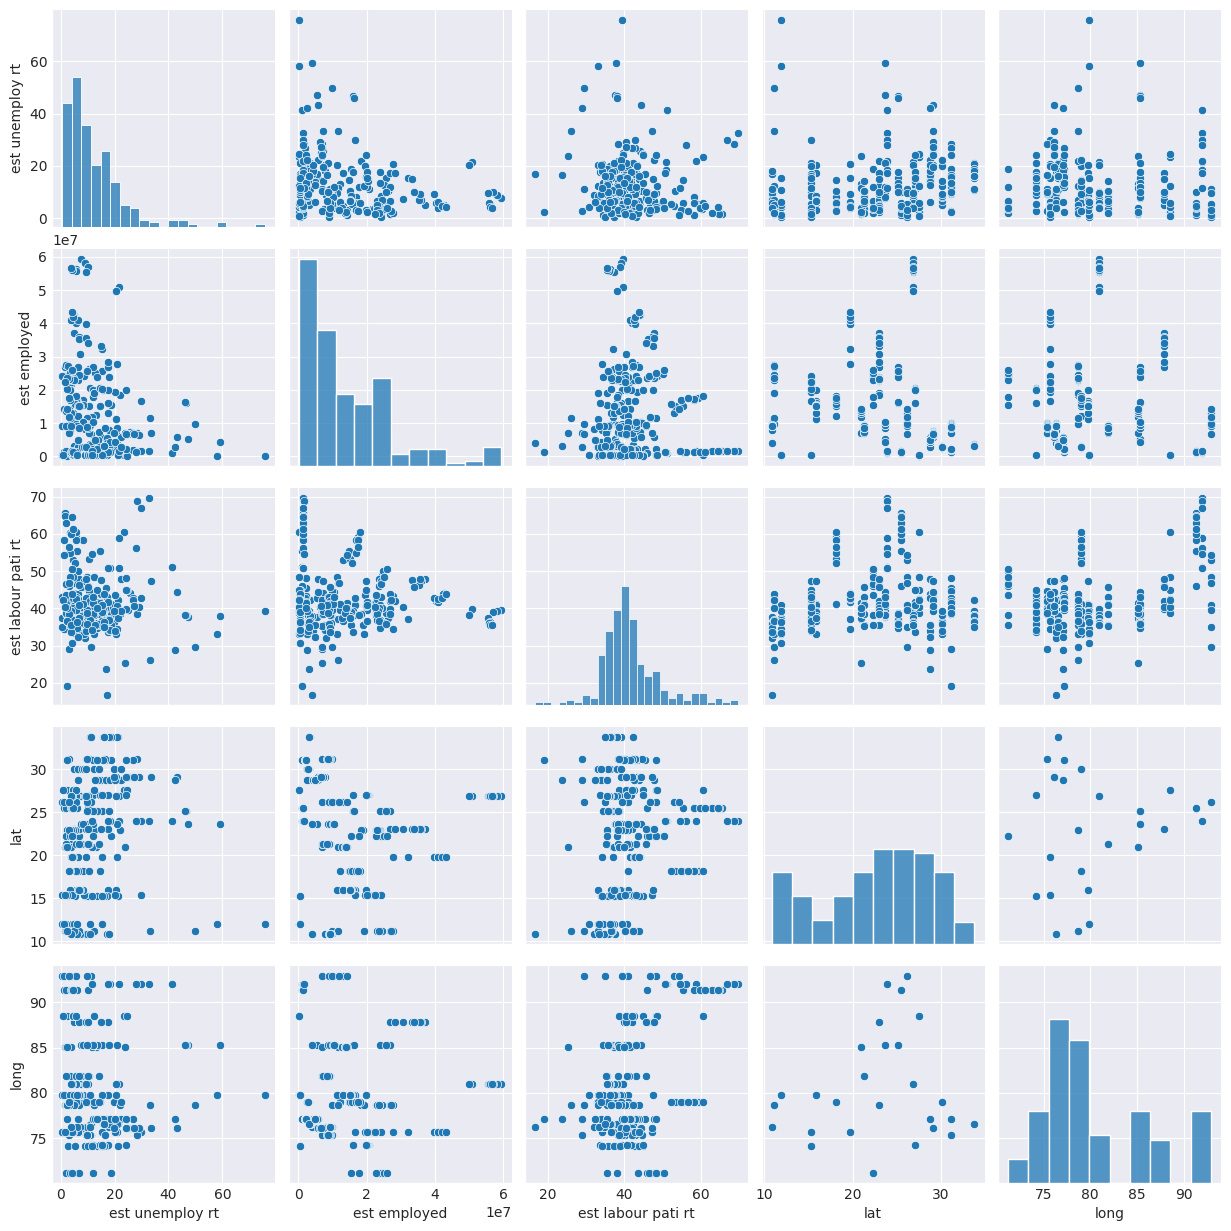

In [30]:
# Scatter plot to see relation between every numeric col 

sns.set_style("darkgrid")
sns.pairplot(df)
plt.show()

[]

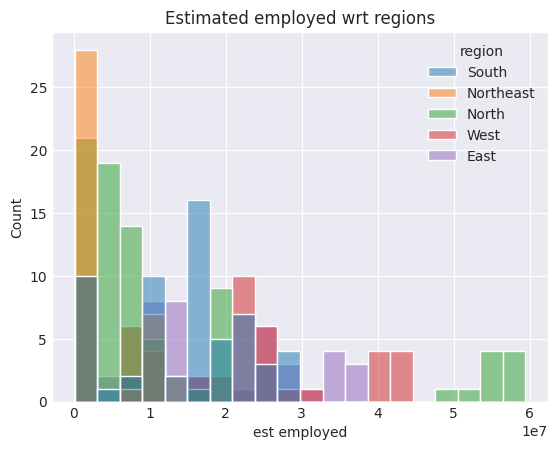

In [31]:
# estimated no of employed wrt regions
plt.title("Estimated employed wrt regions")
sns.histplot(x="est employed", hue="region", data=df,bins=20)
plt.plot()

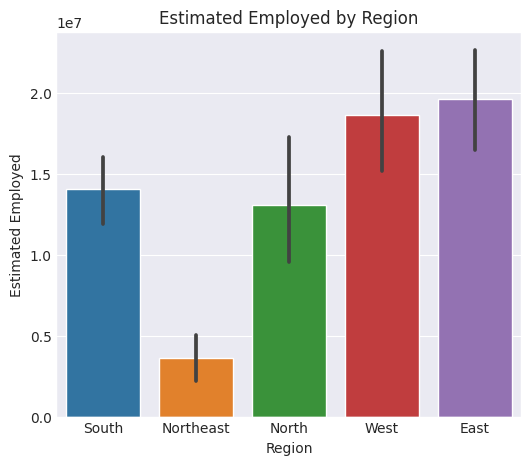

In [32]:
plt.figure(figsize=(6, 5))
plt.title("Estimated Employed by Region")
sns.barplot(x="region", y="est employed", data=df)
plt.xlabel("Region")
plt.ylabel("Estimated Employed")
plt.show()


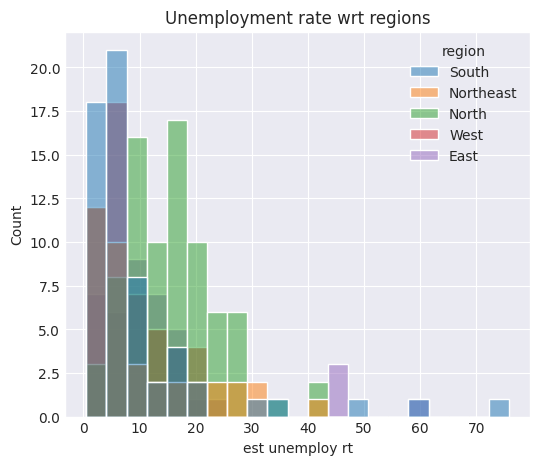

In [33]:
# unemployment rt wrt regions
plt.figure(figsize=(6,5))
plt.title("Unemployment rate wrt regions")
sns.histplot(x="est unemploy rt", hue='region', data=df)
plt.show()

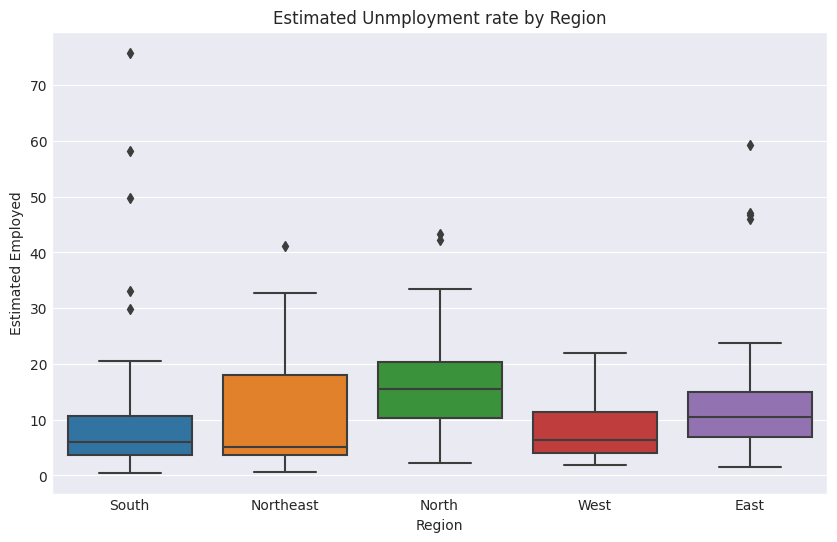

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.title("Estimated Unmployment rate by Region")
sns.boxplot(x="region", y="est unemploy rt", data=df)
plt.xlabel("Region")
plt.ylabel("Estimated Employed")
plt.show()


In [35]:
import plotly.express as px

unemployment = df[["states", "region", "est unemploy rt"]]
# Create the sunburst chart
figure = px.sunburst(unemployment, path=["region", "states"],
                     values="est unemploy rt",
                     color="est unemploy rt",
                     color_continuous_scale="Viridis",
                     title="Unemployment rate in India"
                     )

# Customize the chart appearance
figure.update_traces(textinfo='label+percent entry')
figure.update_layout(
    font=dict(family="Arial", size=12),
    plot_bgcolor='rgb(240,240,240)',
    paper_bgcolor='rgb(240,240,240)',
    margin=dict(l=20, r=20, t=50, b=20),
)

# Display the chart
figure.show()
